PROJECT

This dataset gives the data of Income and money spent by the customers visiting a Shopping 
Mall. The data set contains Customer ID, Gender, Age, Annual Income, Spending Score. 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing csv 
file

In [2]:
df=pd.read_csv('project.csv')

# Understand the data

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
 5   Cluster                 200 non-null    int32
dtypes: int32(1), int64(5)
memory usage: 8.7 KB


In [31]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000
mean,100.500000,0.440000,38.850000,60.560000,50.200000,0.55500
std,57.879185,0.497633,13.969007,26.264721,25.823522,0.77458
min,1.000000,0.000000,18.000000,15.000000,1.000000,0.00000
25%,50.750000,0.000000,28.750000,41.500000,34.750000,0.00000
50%,100.500000,0.000000,36.000000,61.500000,50.000000,0.00000
75%,150.250000,1.000000,49.000000,78.000000,73.000000,1.00000
max,200.000000,1.000000,70.000000,137.000000,99.000000,2.00000


CHECK FOR MISSING VALUES

In [32]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Cluster                   0
dtype: int64

#ANALYZE THE DATA

VISUALIZE THE DATA

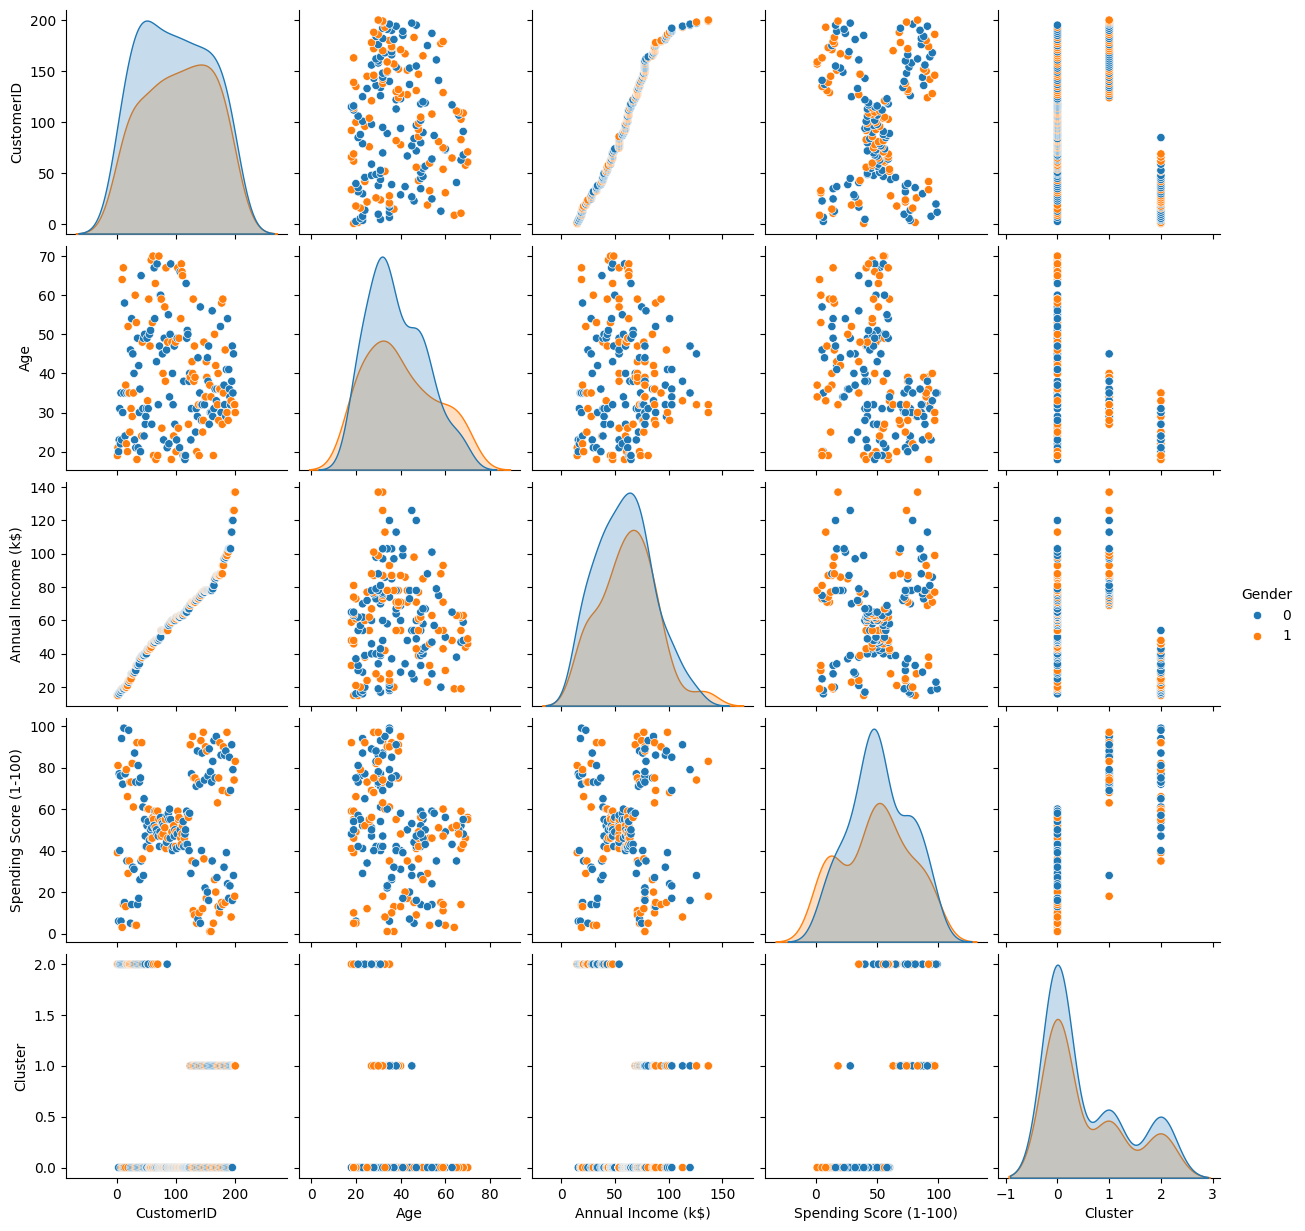

In [33]:
sns.pairplot(df, hue="Gender")
plt.show()

NumPy in Data Preprocessing

In [43]:
np.random.seed(42)  # Ensure reproducibility
random_data = np.random.rand(5, 3)  # 5 rows, 3 columns


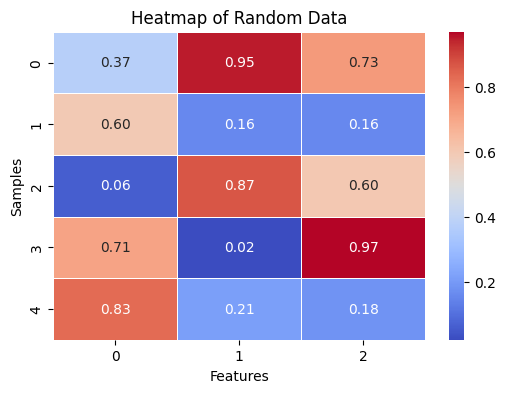

In [44]:
plt.figure(figsize=(6,4))
sns.heatmap(random_data, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Random Data")
plt.xlabel("Features")
plt.ylabel("Samples")
plt.show()

Split Data into Features and Target

In [34]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = df['Spending Score (1-100)']

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

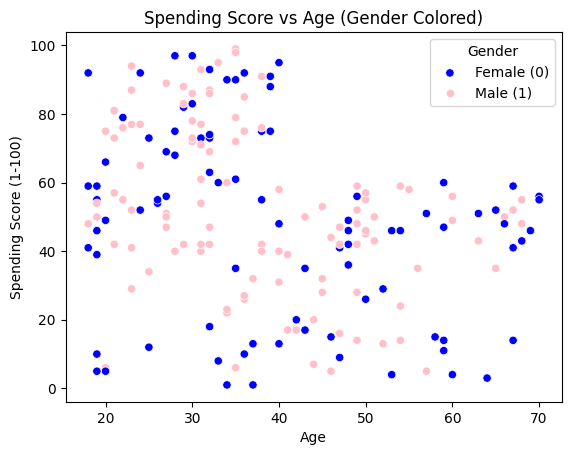

In [36]:
sns.scatterplot(x=df['Age'], y=df['Spending Score (1-100)'], hue=df['Gender'], palette=['pink', 'blue'])
plt.title("Spending Score vs Age (Gender Colored)")
plt.legend(title="Gender", labels=["Female (0)", "Male (1)"])
plt.show()


#Split Data into Training and Testing Sets

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


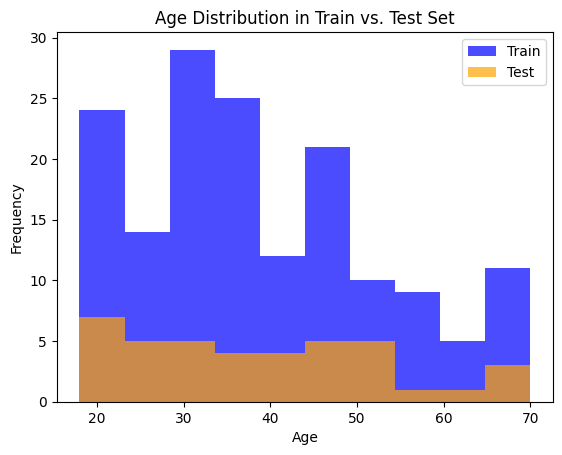

In [38]:
plt.hist(X_train["Age"], bins=10, alpha=0.7, label="Train", color="blue")
plt.hist(X_test["Age"], bins=10, alpha=0.7, label="Test", color="orange")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution in Train vs. Test Set")
plt.legend()
plt.show()


Select An ML Algorithm

FOR CLUSTERING K-MEANS

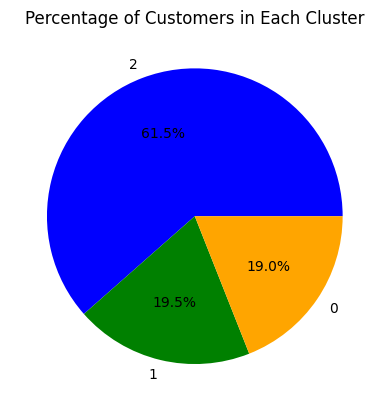

In [39]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

X_cluster = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df["Cluster"] = kmeans.fit_predict(X_cluster)
df["Cluster"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["blue", "green", "orange"])
plt.title("Percentage of Customers in Each Cluster")
plt.ylabel("")  # Hide the y-label
plt.show()

Train the Model

In [40]:
kmeans.fit(X)
df['Cluster'] = kmeans.labels_

Predict Output using Model

In [41]:
clusters = kmeans.predict(X)


Model Evaluation

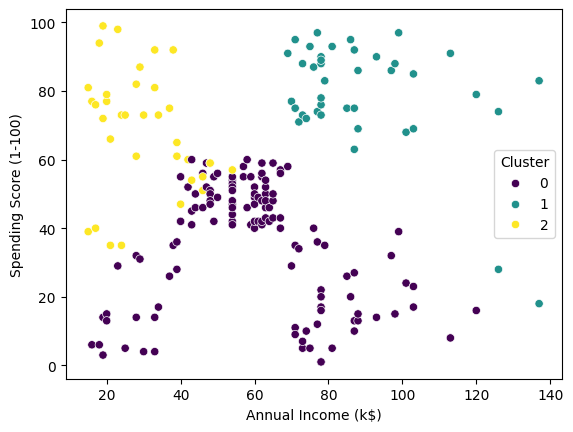

In [42]:
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], hue=df['Cluster'], palette="viridis")
plt.show()
